In [17]:
import warnings
warnings.filterwarnings("ignore")

#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries to set up RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn import metrics



In [18]:
#Read the flights
df = pd.read_csv('data/EDA_for_models.csv')
df.head()

,distance,arr_delay,crs_dep_time_convert,crs_arr_time_convert,duration,average_speed,avg_dep_delay_by_carrier,avgfuel_percustomer_perdistance,yearly_arrivals_per_ap,yearly_arriving_passengers_per_ap,...,month_10,month_11,month_12,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,-1.121064,-0.082922,1.199988,1.059334,-0.970006,-2.346811,0.751258,0.666065,0.728606,0.432927,...,0,0,0,1,0,0,0,0,0,0
1,-0.827246,-0.082922,0.531634,0.441222,-0.909598,-0.844355,0.751258,0.666065,-0.785920,-0.705407,...,0,0,0,0,0,0,0,0,1,0
2,-0.402228,-0.082922,0.363706,0.428543,-0.214905,-0.448253,0.751258,0.666065,-1.117036,-1.129657,...,0,0,0,0,1,0,0,0,0,0
3,-0.513102,-0.082922,-0.794999,-0.795002,-0.834088,0.542002,-0.355855,-1.109920,-0.512376,-0.378314,...,0,0,0,0,0,1,0,0,0,0
4,-0.461361,-0.082922,-0.778206,-0.684059,-0.381027,-0.359471,0.667968,0.913843,-1.104272,-1.131256,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# Create features (X) and labels (y)
y = df['arr_delay']
X = df.drop(['arr_delay','flight_delay','average_speed'], axis=1)

In [20]:
# Perform the split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [7]:
# create the classifier with n_estimators = 100
rf_clf = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state = 0)


# fit the model to the training set
rf_clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

In [8]:
# view the feature scores

feature_scores_rf = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores_rf

cancelled_flights                    0.293378
crs_dep_time                         0.289586
crs_dep_time_convert                 0.270486
month_7                              0.052382
crs_arr_time_convert                 0.050531
avg_dep_delay_by_carrier             0.010984
crs_elapsed_time                     0.010567
avgfuel_percustomer_perdistance      0.008565
yearly_arrivals_per_ap               0.006973
average_arrival_delay_by_ap          0.006548
distance                             0.000000
day_of_week_1                        0.000000
month_11                             0.000000
month_12                             0.000000
day_of_week_4                        0.000000
day_of_week_2                        0.000000
day_of_week_3                        0.000000
month_9                              0.000000
day_of_week_5                        0.000000
day_of_week_6                        0.000000
month_10                             0.000000
month_4                           

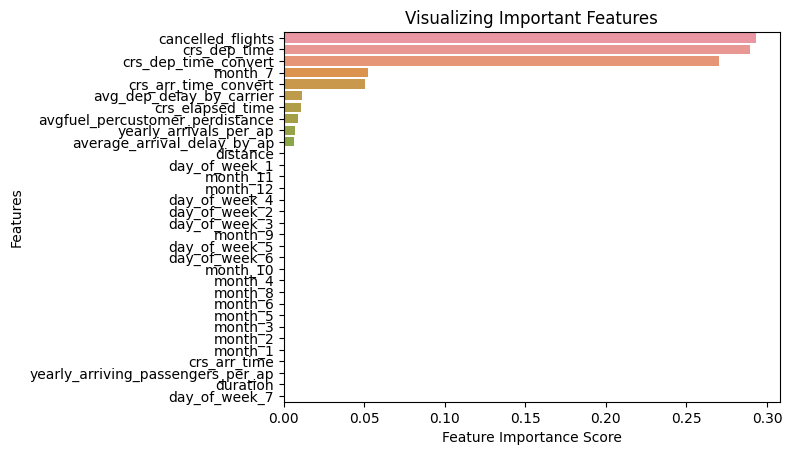

In [9]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores_rf, y=feature_scores_rf.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [10]:
rf_clf.score(X_train,y_train)

0.020678787581060232

In [11]:
#rf_clf.score(X_test,y_test)

In [12]:
# Test set predictions
y_pred=rf_clf.predict(X_test)

In [13]:
r2_score(y_test, y_pred)

0.017029015005256887

### Using GridSearchCV & Cross Validation

In [45]:
from sklearn.model_selection import GridSearchCV

# Make a dictionary with model arguments as keys and lists of grid settings as values
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 100, 1000],
    'max_features': ["sqrt", "log2", "auto"],
    'n_estimators': [10,  50,  100]
    
}

rf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose =2, scoring='r2', n_jobs = -1) # verbose=1 -> print results, n_jobs=-1 -> use all processors in parallel
grid.fit(X_train, y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 100, 1000],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'n_estimators': [10, 50, 100]},
             scoring='r2', verbose=2)

In [46]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [47]:
print(f'Train Accuracy - : {grid.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.164
Train Accuracy - : 0.023


In [60]:
y_pred_test=grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2) 

MSE: 1.17
R2: 0.02


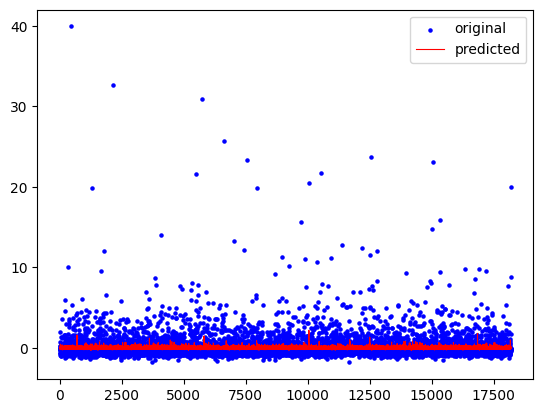

In [62]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [48]:
y_pred_test = grid.predict(X_test)
r2_score(y_test, y_pred_test)

0.022894923306308046

In [53]:
# With hyperparameter tuned 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.3809808968228368
MSE: 1.1731565306314475
RMSE: 1.0831235066378384


In [21]:
# create the classifier with n_estimators = 100
rf_clf_hp = RandomForestRegressor(ccp_alpha=0.001, n_estimators=100, max_depth = 10, bootstrap=True,max_features='sqrt' ,random_state = 0)

# fit the model to the training set
rf_clf_hp.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.001, max_depth=10, max_features='sqrt',
                      random_state=0)

In [22]:
print(f'Train Accuracy - : {rf_clf_hp.score(X_train,y_train):.2f}')
print(f'Test Accuracy - : {rf_clf_hp.score(X_test,y_test):.2f}')

Train Accuracy - : 0.11
Test Accuracy - : 0.02


In [23]:
y_pred_hp_test = rf_clf_hp.predict(X_test)

In [24]:
# With hyperparameter tuned 

print('MAE:', metrics.mean_absolute_error(y_test,y_pred_hp_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_hp_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_hp_test)))

MAE: 0.3831176336842586
MSE: 1.1778063795668692
RMSE: 1.0852678837811747
